In [694]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [695]:
demography = pd.read_excel('data/all.xlsx')

In [696]:
demography.drop_duplicates('ID', inplace=True)

In [697]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [698]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.474820,72.848921,0.425827
Czech cuisine,53.759740,56.675325,0.394935
Italian cuisine,50.669065,83.726619,0.432302


In [699]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.0,44.0,0.380
Czech cuisine,54.0,38.0,0.345
Italian cuisine,52.0,45.0,0.370


In [700]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

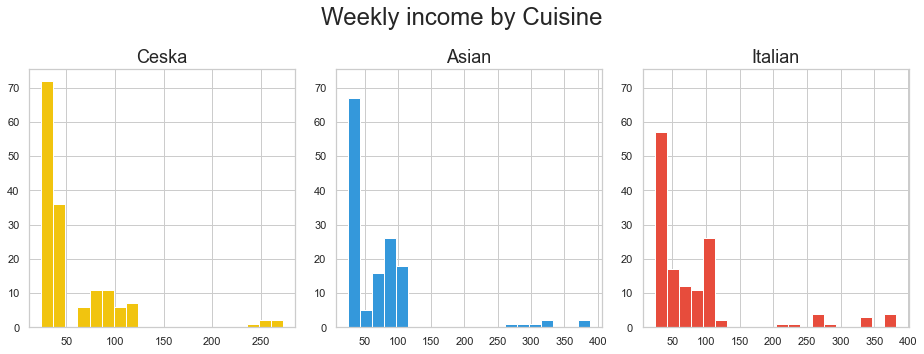

In [701]:
plt.figure(figsize=(13,5))
plt.suptitle("Weekly income by Cuisine", fontsize=24)
ax = plt.subplot(1,3,1)

plt.hist(cz['Weekly income'], label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska', fontsize=18)

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian['Weekly income'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it['Weekly income'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.tight_layout()

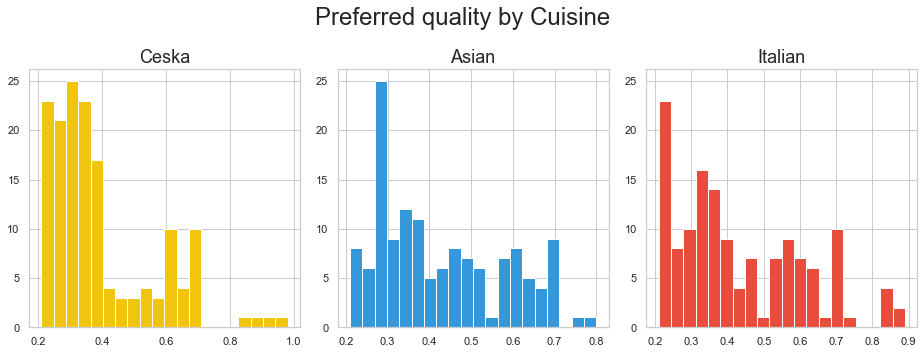

In [702]:
plt.figure(figsize=(13,5))
ax = plt.subplot(1,3,1)
plt.suptitle("Preferred quality by Cuisine", fontsize=24)

plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska', fontsize=18)

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.tight_layout()

# Favourite category

<BarContainer object of 3 artists>

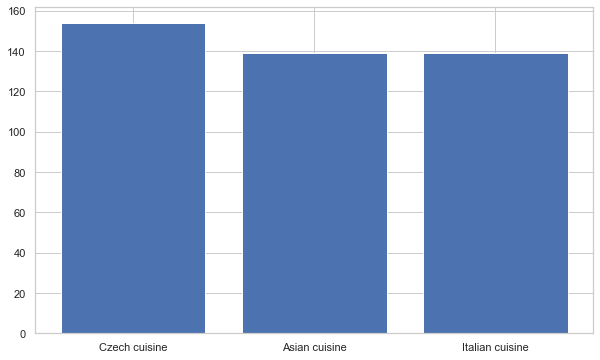

In [703]:
plt.figure(figsize=(10,6))

fixed_fcat = demography.value_counts('Favourite category').reset_index().rename(columns={0:'Count'})

plt.bar(fixed_fcat['Favourite category'], fixed_fcat['Count'])

# sns.set_theme(style="whitegrid")
# fav = demography.value_counts('Favourite category')
# fav = pd.DataFrame(fav).rename(columns={0:'Count'})
# fav.reset_index(inplace=True)
# sns.barplot(x='Favourite category', y='count', data=fav);

# Ad Type

In [704]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          208
print-on-bus              68
citylight                 59
promo stand small         36
hostess on the street     31
billboard                 27
radio spot                 3
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [705]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

In [706]:
asia = cat_ad_graph['Asian cuisine'].reset_index()

In [707]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [708]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

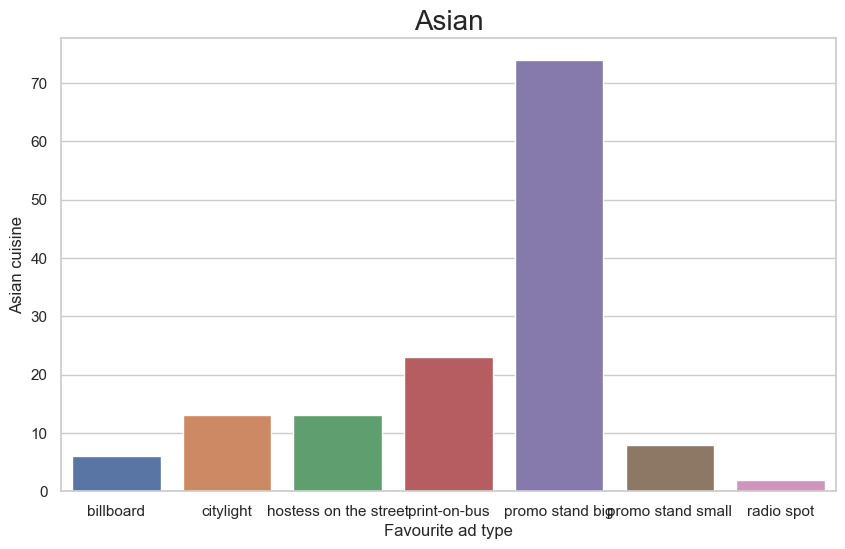

In [709]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asia, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

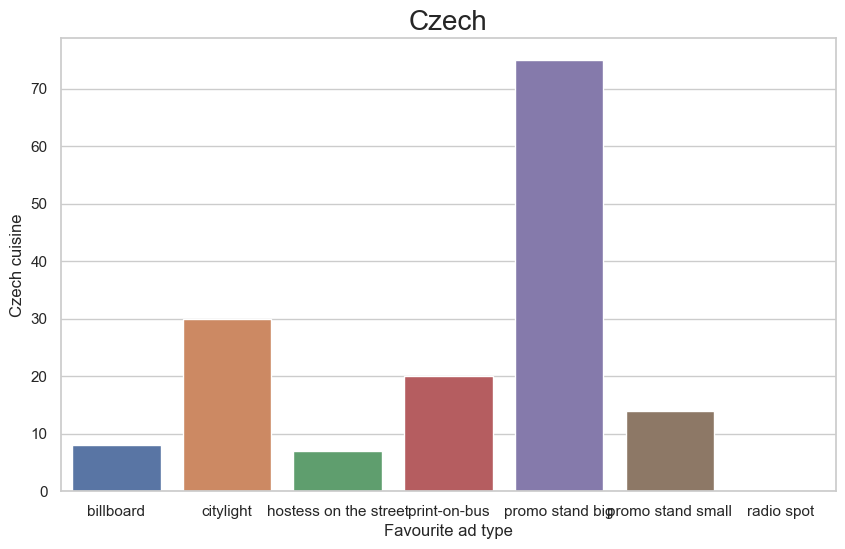

In [710]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

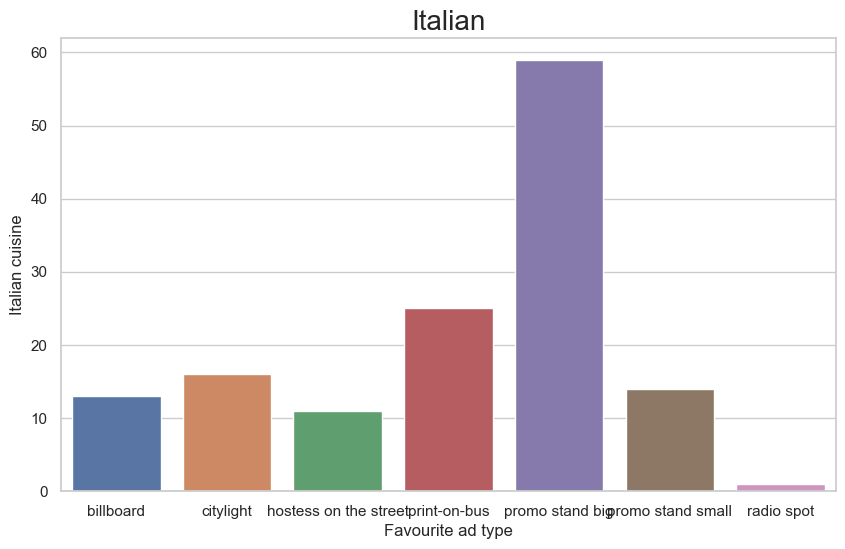

In [711]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

<AxesSubplot:xlabel='Favourite ad type', ylabel='Italian cuisine'>

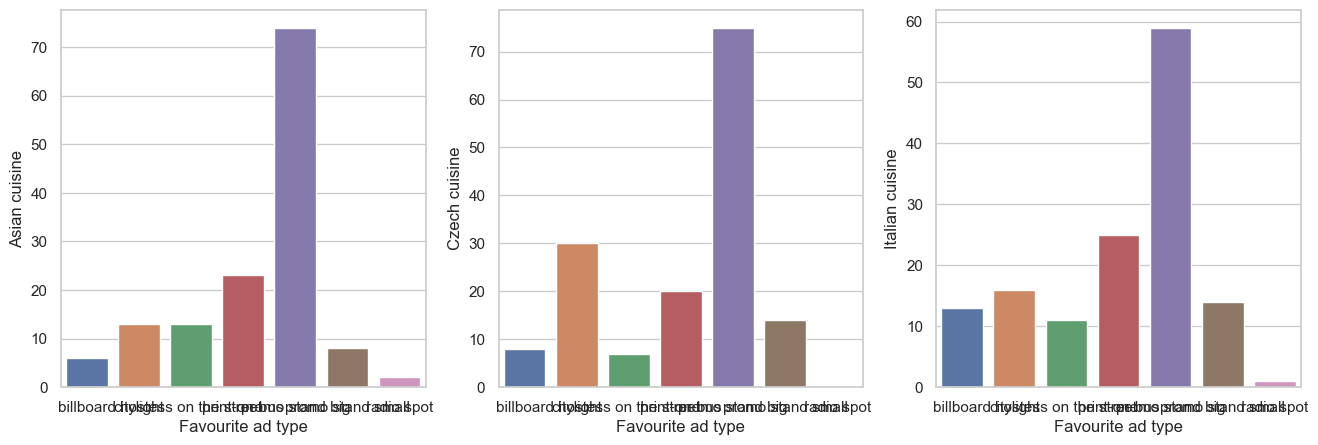

In [712]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asia, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2])

# Более точная выборка дней по кухне и рекламе [cz, asian, it]

In [713]:
ad = cz['Favourite ad type'] == 'promo stand big'
quality = cz['Preferred quality'].between(0.25,0.4)
weekly = cz['Weekly income'].between(30,50)

In [714]:
cz_df = cz[ad & quality & weekly]

In [715]:
top_locations = cz_df.describe(include='object')

In [716]:
top_locations.drop(['count', 'unique'], inplace=True)

In [717]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,20
5,MON 8-16h,Industrial district,24
6,MON 16-24h,Housing district,31
7,TUE 0-8h,Outskirts,19
8,TUE 8-16h,Industrial district,22
9,TUE 16-24h,Housing district,33
10,WED 0-8h,Industrial district,22
11,WED 8-16h,Industrial district,18
12,WED 16-24h,Housing district,18
13,THU 0-8h,Outskirts,19


In [718]:
metriki = cz_df.describe()

In [719]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,51.212121,52.00
Weekly income,37.878788,37.00
Preferred quality,0.331818,0.35


# WIP

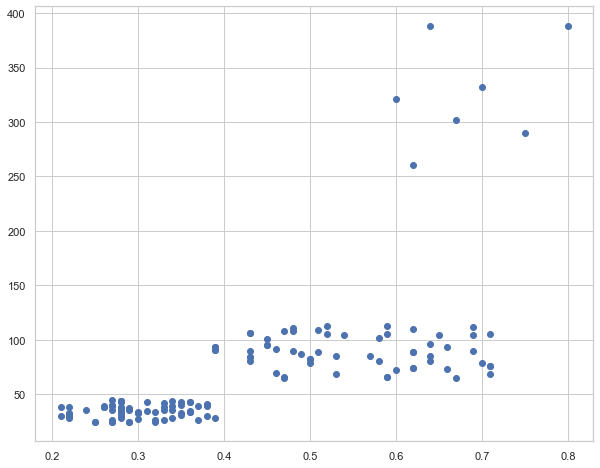

In [720]:
plt.figure(figsize=(10,8))
plt.scatter(asian['Preferred quality'], asian['Weekly income'])